In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [15]:
# import les donnees
df = pd.read_csv("./Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
dfa= df[['Age', "Annual Income (k$)"]]
dfa

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [18]:
# Standardiser les données
scdfa = StandardScaler()
dfa_std = scdfa.fit_transform(dfa.astype(float))
dfa_std

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033],
       [-1.20926872, -1.66266033],
       [-0.27630176, -1.62449091],
       [-1.13750203, -1.62449091],
       [ 1.80493225, -1.58632148],
       [-0.6351352 , -1.58632148],
       [ 2.02023231, -1.58632148],
       [-0.27630176, -1.58632148],
       [ 1.37433211, -1.54815205],
       [-1.06573534, -1.54815205],
       [-0.13276838, -1.54815205],
       [-1.20926872, -1.54815205],
       [-0.27630176, -1.50998262],
       [-1.3528021 , -1.50998262],
       [ 0.94373197, -1.43364376],
       [-0.27630176, -1.43364376],
       [-0.27630176, -1.39547433],
       [-0.99396865, -1.39547433],
       [ 0.51313183, -1.3573049 ],
       [-0.56336851, -1.3573049 ],
       [ 1.08726535, -1.24279661],
       [-0.70690189, -1.24279661],
       [ 0.44136514, -1.24279661],
       [-0.27630176, -1.24279661],
       [ 0.08253169,

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

[250.58811570754693, 132.85530421221918, 103.05151849277249, 81.3349416877298, 67.36790953035506, 54.88956607233395, 48.137266202957605, 41.633986534319114, 36.838192276910114]


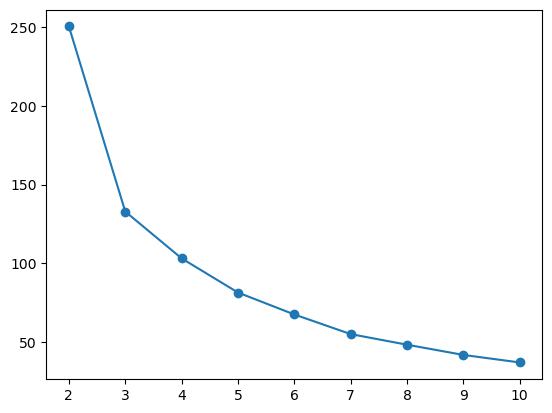

In [22]:
# Appliquer le Kmeans
cluster_range = [2,3,4,5,6,7,8,9,10]
inertie = []
for c in cluster_range:
    kmeans= KMeans(init='k-means++', n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)

print(inertie)

# dessiner les inerties calculées
plt.figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

In [23]:
# On part sur 3 cluster

kmeans = KMeans(n_clusters=3).fit(dfa_std)

#affecter les clusters a la variable é labels
labels= kmeans.labels_

# creer un dataset qui contient les valeurs de dfa_std
new_dfa = pd.DataFrame(data=dfa_std, columns=['age','revenu_annuel'])


#rajouter les labels a mon dataset dfa_std
new_dfa['labels_kmeans']= labels
new_dfa

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,age,revenu_annuel,labels_kmeans
0,-1.424569,-1.738999,2
1,-1.281035,-1.738999,2
2,-1.352802,-1.700830,2
3,-1.137502,-1.700830,2
4,-0.563369,-1.662660,2
...,...,...,...
195,-0.276302,2.268791,1
196,0.441365,2.497807,1
197,-0.491602,2.497807,1
198,-0.491602,2.917671,1


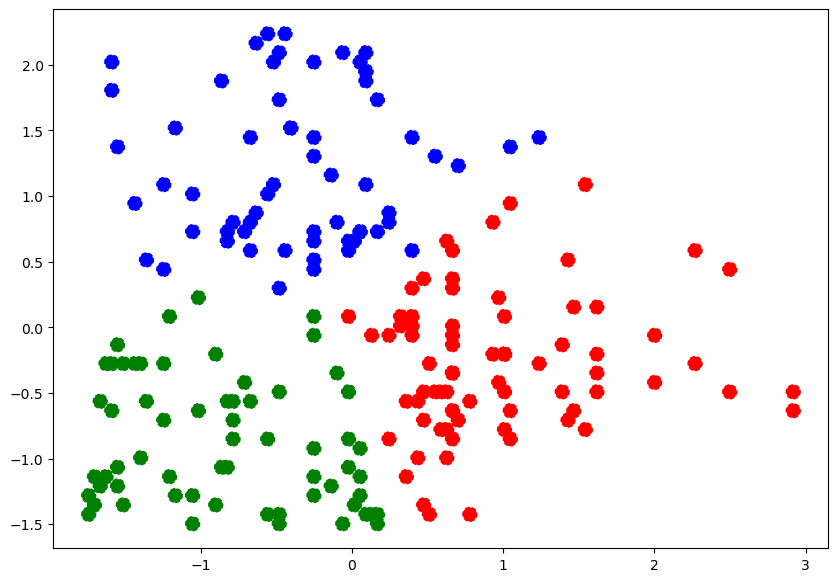

In [30]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==0],new_dfa['age'][new_dfa['labels_kmeans']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==1],new_dfa['age'][new_dfa['labels_kmeans']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_dfa['revenu_annuel'][new_dfa['labels_kmeans']==2],new_dfa['age'][new_dfa['labels_kmeans']==2],
            color='green',s=100,linestyle='--')

plt.show()